**Importing The Necessary Packages**

In [ ]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

**Data Preparation**

In [ ]:
# Step 1: Data Preparation
image_folder = '/content/Images'  # Path to the directory containing images
images = os.listdir(image_folder)

**Importing the Images and Processing the Images**

In [ ]:
def process_image(img_path):
    print("Processing image:", img_path)

    # Step 3: Read Image
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Unable to read image at path:", img_path)
        return

    # Step 4: Image Processing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((1, 50), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=1)
    mask = cv2.dilate(mask, kernel, iterations=1)
    result = cv2.bitwise_and(thresh, thresh, mask=mask)
    mask2 = cv2.bitwise_not(mask)
    result2 = cv2.bitwise_and(thresh, thresh, mask=mask2)
    img_mask = cv2.threshold(mask2, 150, 255, cv2.THRESH_BINARY)[1]
    diff = cv2.absdiff(img_mask, thresh)
    num_labels, labels, _, _ = cv2.connectedComponentsWithStats(thresh, connectivity=8)
    label_image = (255 / num_labels) * labels.astype(np.uint8)

    return img, gray, thresh, mask, result, mask2, result2, diff, label_image

**Displaying The Images**

In [ ]:
def display_results(images):
    titles = ['Original', 'Gray', 'Threshold', 'Mask', 'Result', 'Mask 2', 'Result 2', 'Difference', 'Connected Components']
    plt.figure(figsize=(12, 8))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(3, 3, i)
        plt.imshow(image, cmap='gray' if i != 1 and i != 8 else None)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

**Processing the data**

Processing image: /content/Images/X_070.jpeg


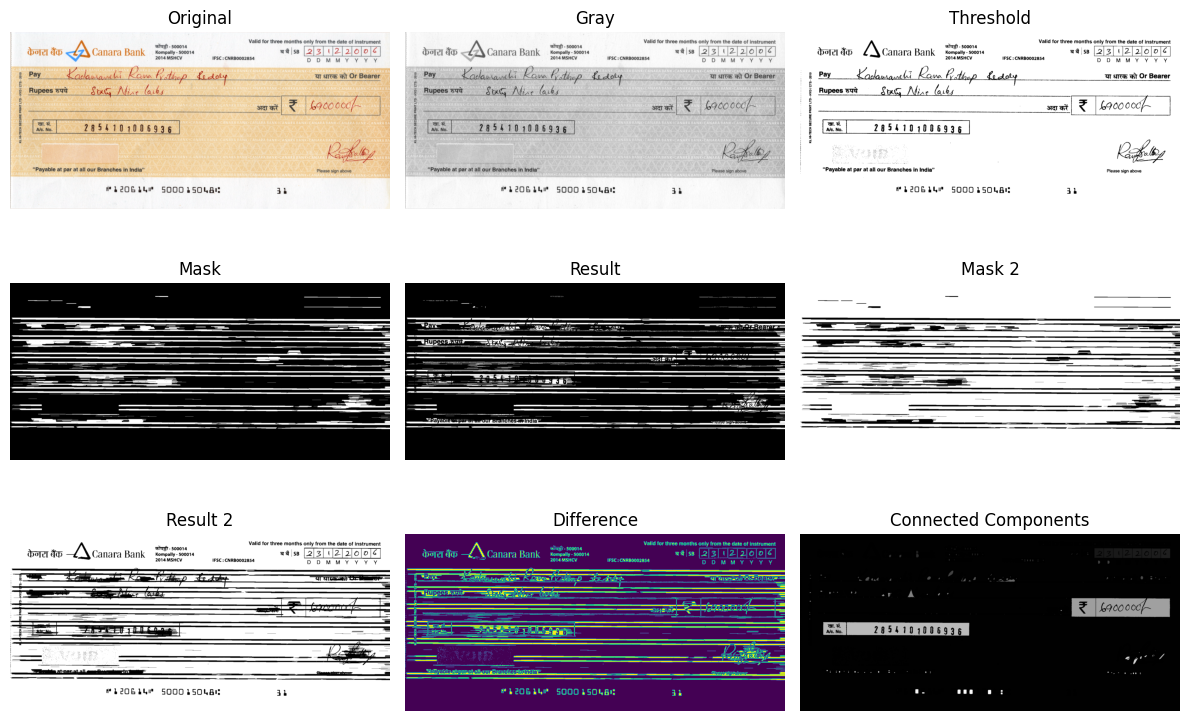

Connected components image saved at: /content/ConnectedComponentsImages/X_070_connected_components.jpg
Processing image: /content/Images/X_076.jpeg


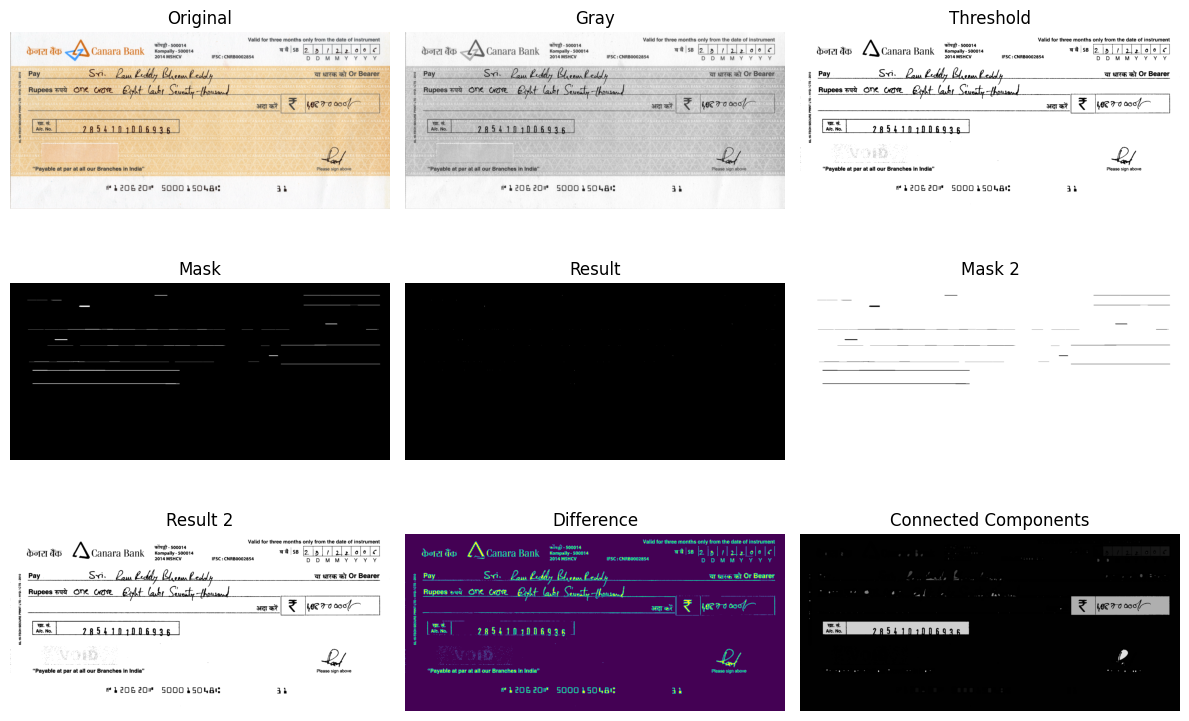

Connected components image saved at: /content/ConnectedComponentsImages/X_076_connected_components.jpg
Processing image: /content/Images/X_069.jpeg


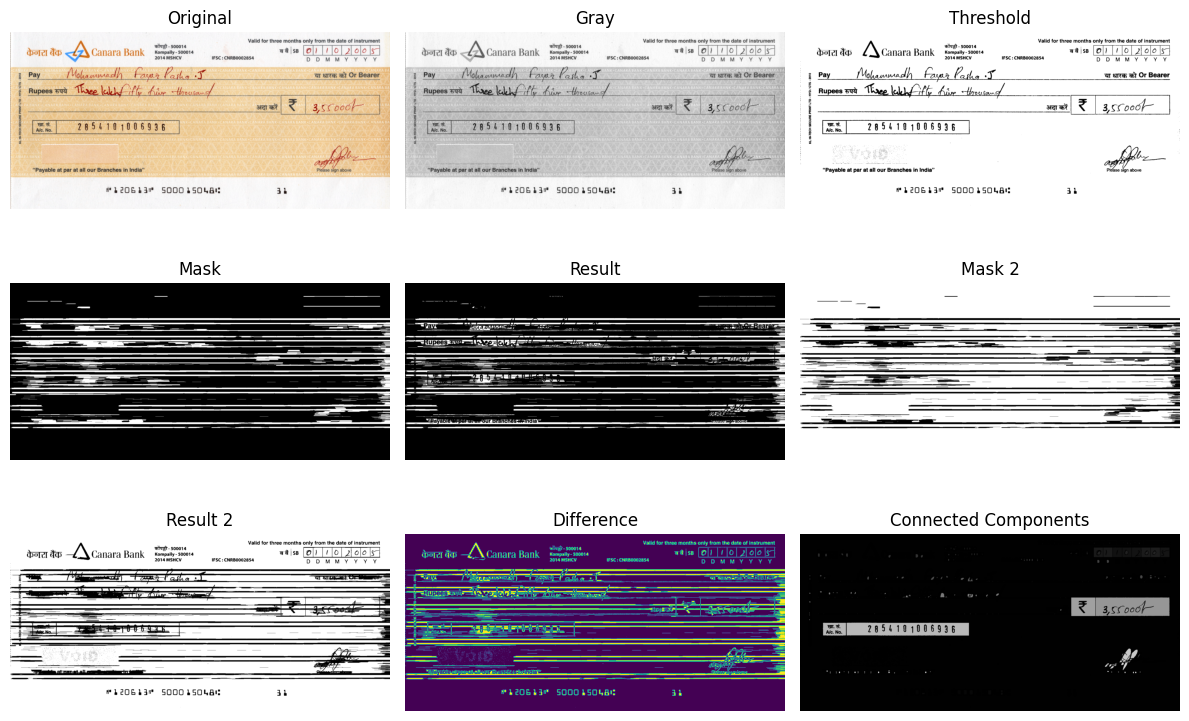

Connected components image saved at: /content/ConnectedComponentsImages/X_069_connected_components.jpg
Processing image: /content/Images/X_072.jpeg


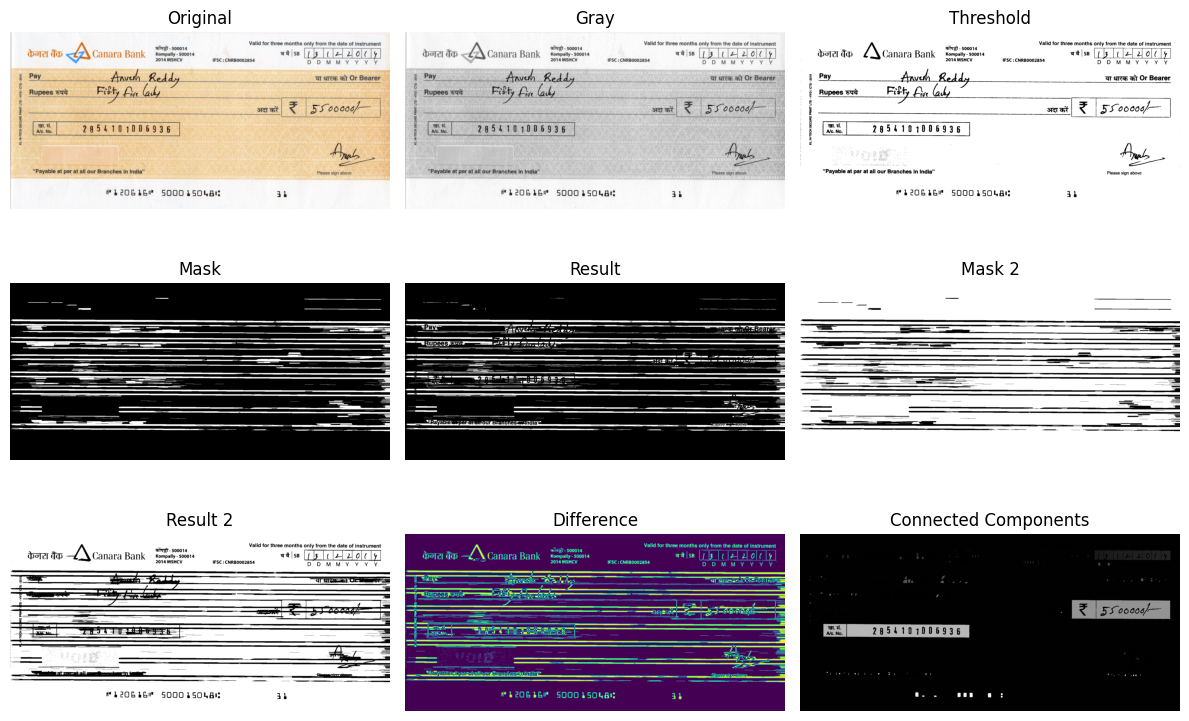

Connected components image saved at: /content/ConnectedComponentsImages/X_072_connected_components.jpg
Processing image: /content/Images/X_064.jpeg


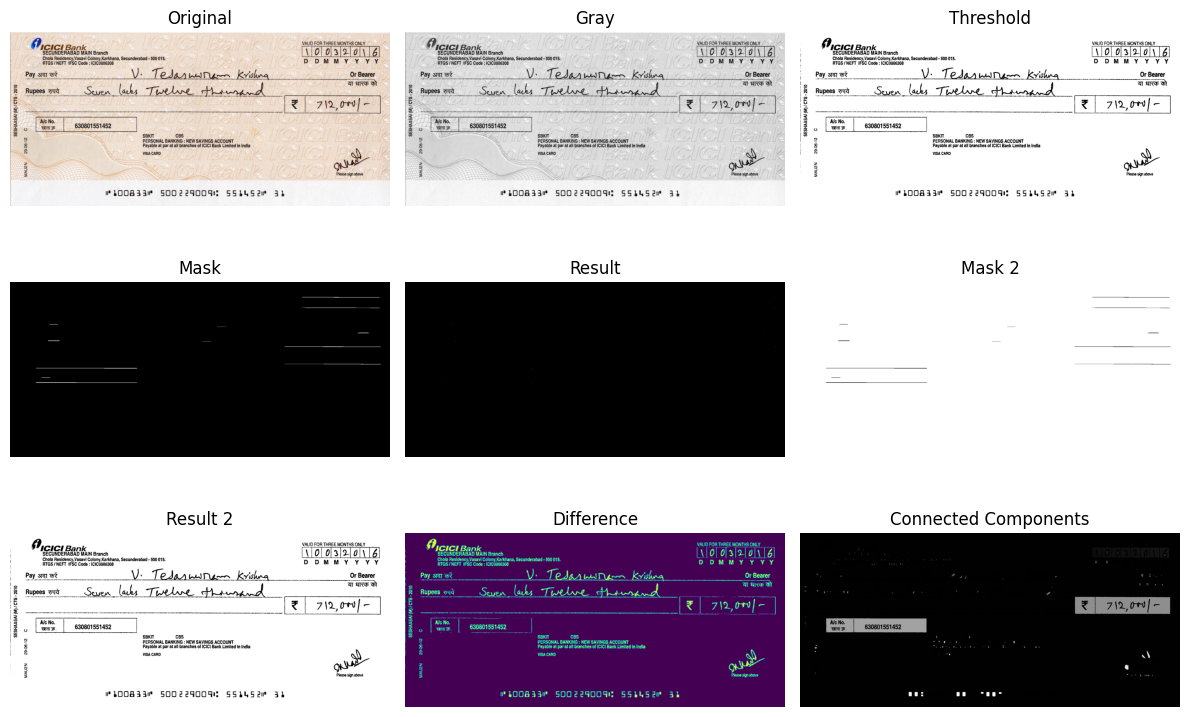

Connected components image saved at: /content/ConnectedComponentsImages/X_064_connected_components.jpg
Processing image: /content/Images/X_065.jpeg


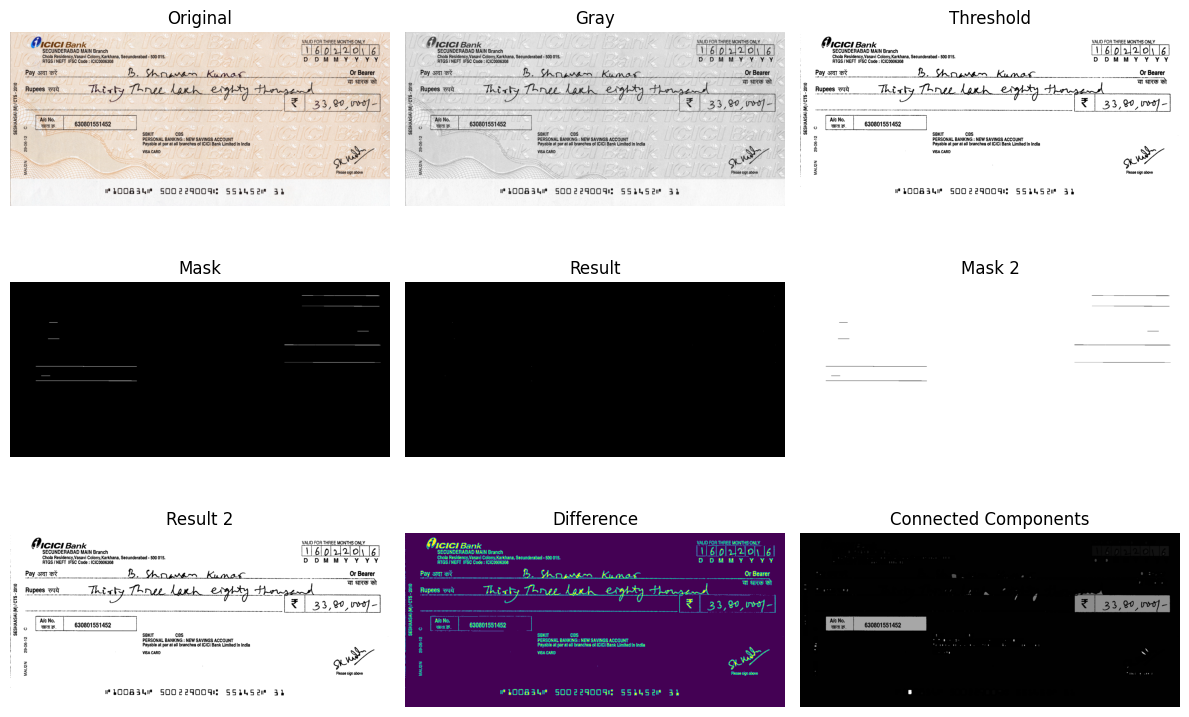

Connected components image saved at: /content/ConnectedComponentsImages/X_065_connected_components.jpg
Processing image: /content/Images/X_075.jpeg


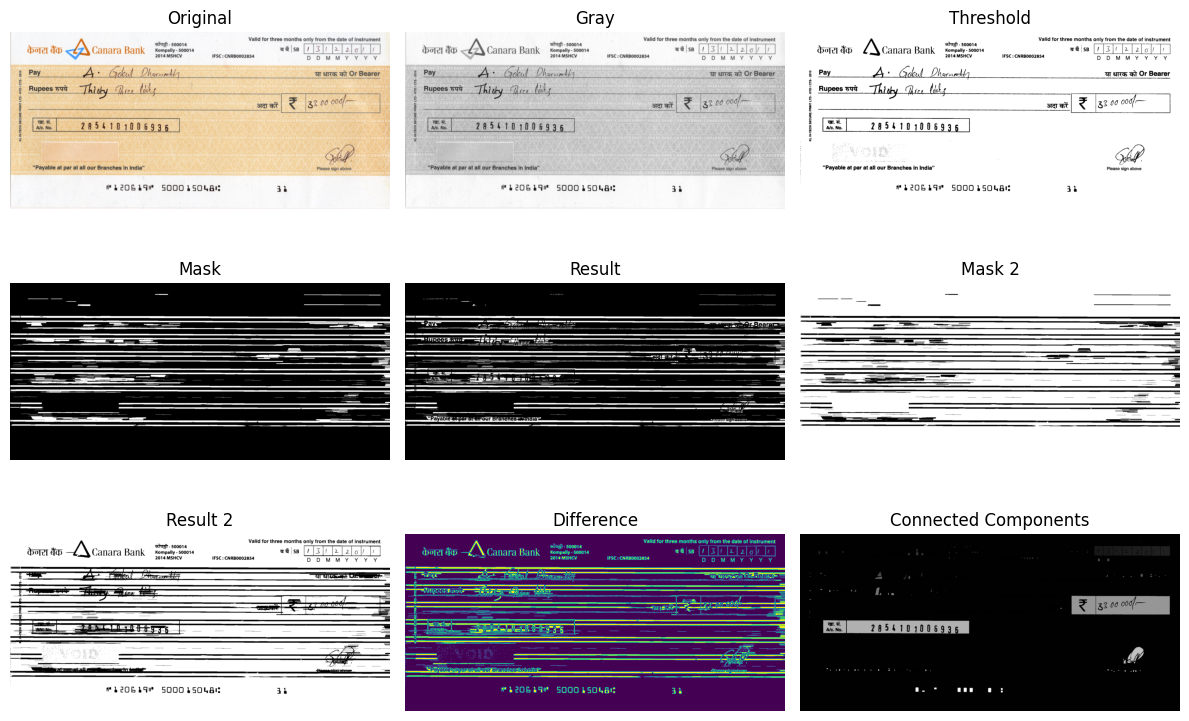

Connected components image saved at: /content/ConnectedComponentsImages/X_075_connected_components.jpg
Processing image: /content/Images/X_068.jpeg


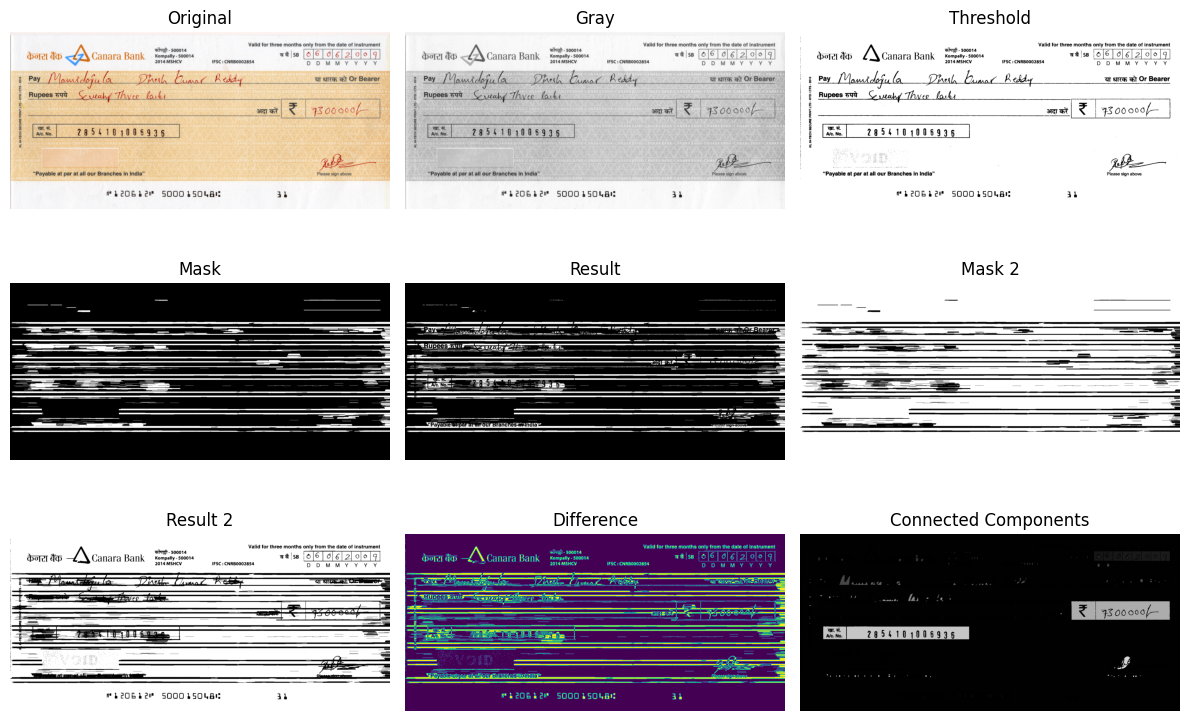

Connected components image saved at: /content/ConnectedComponentsImages/X_068_connected_components.jpg
Processing image: /content/Images/X_067.jpeg


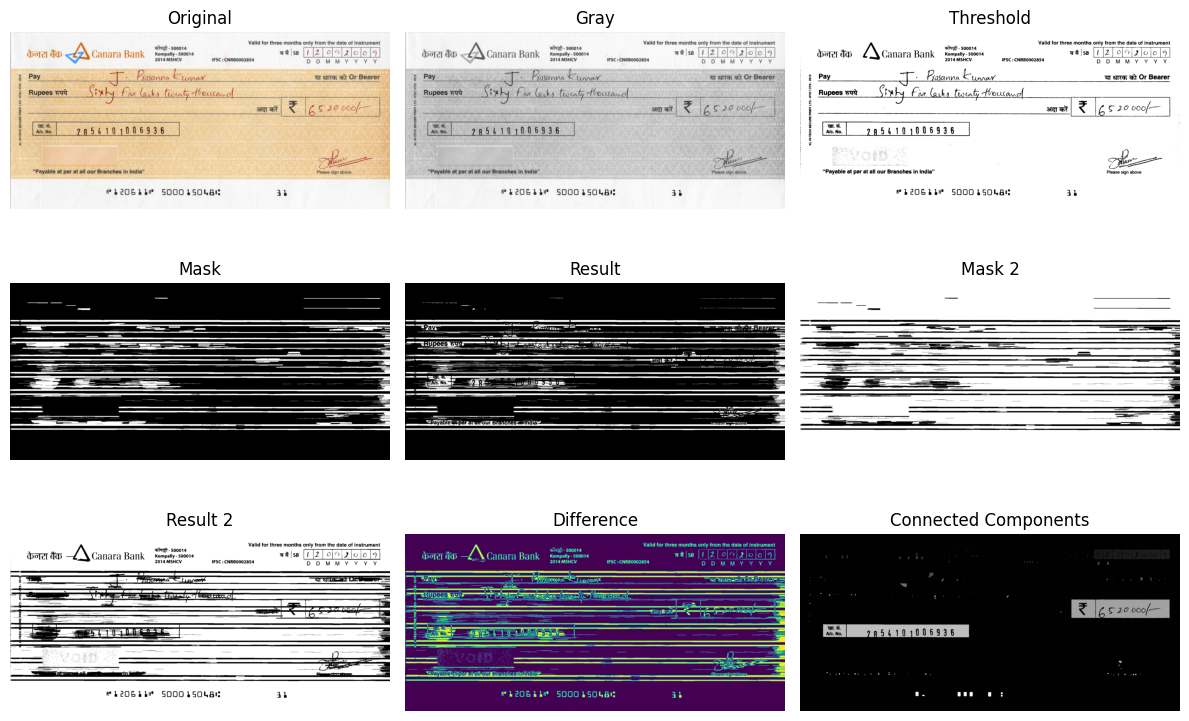

Connected components image saved at: /content/ConnectedComponentsImages/X_067_connected_components.jpg
Processing image: /content/Images/X_071.jpeg


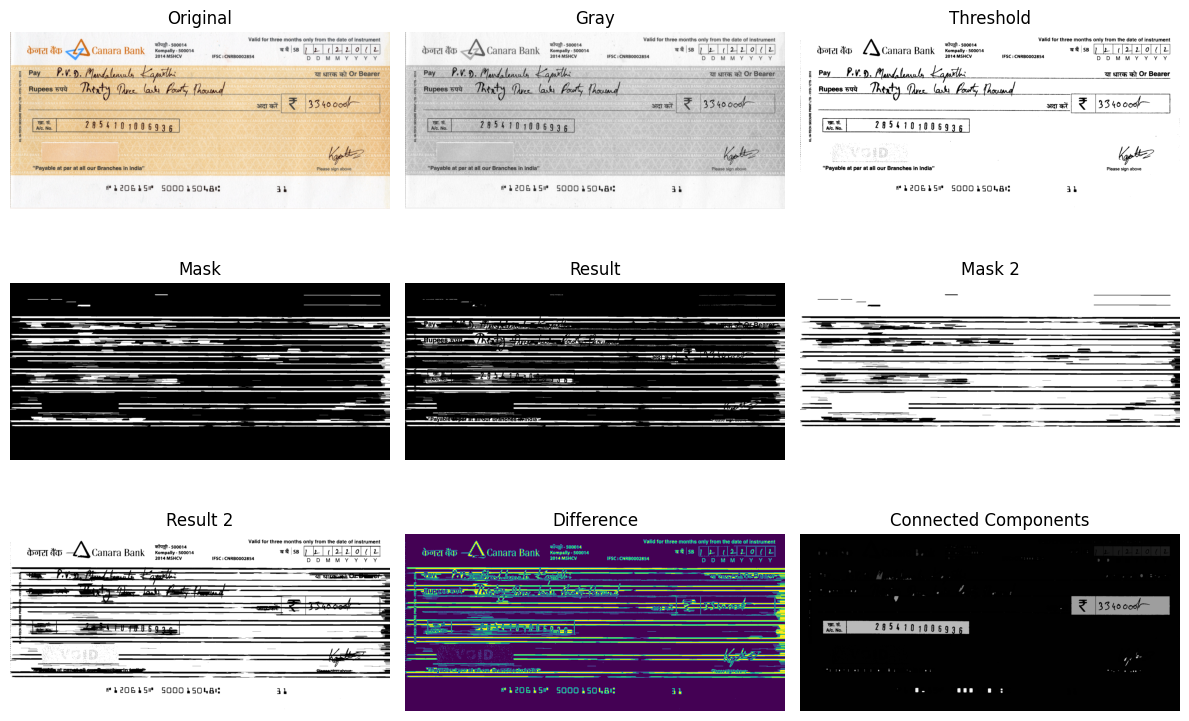

Connected components image saved at: /content/ConnectedComponentsImages/X_071_connected_components.jpg
Processing image: /content/Images/X_074.jpeg


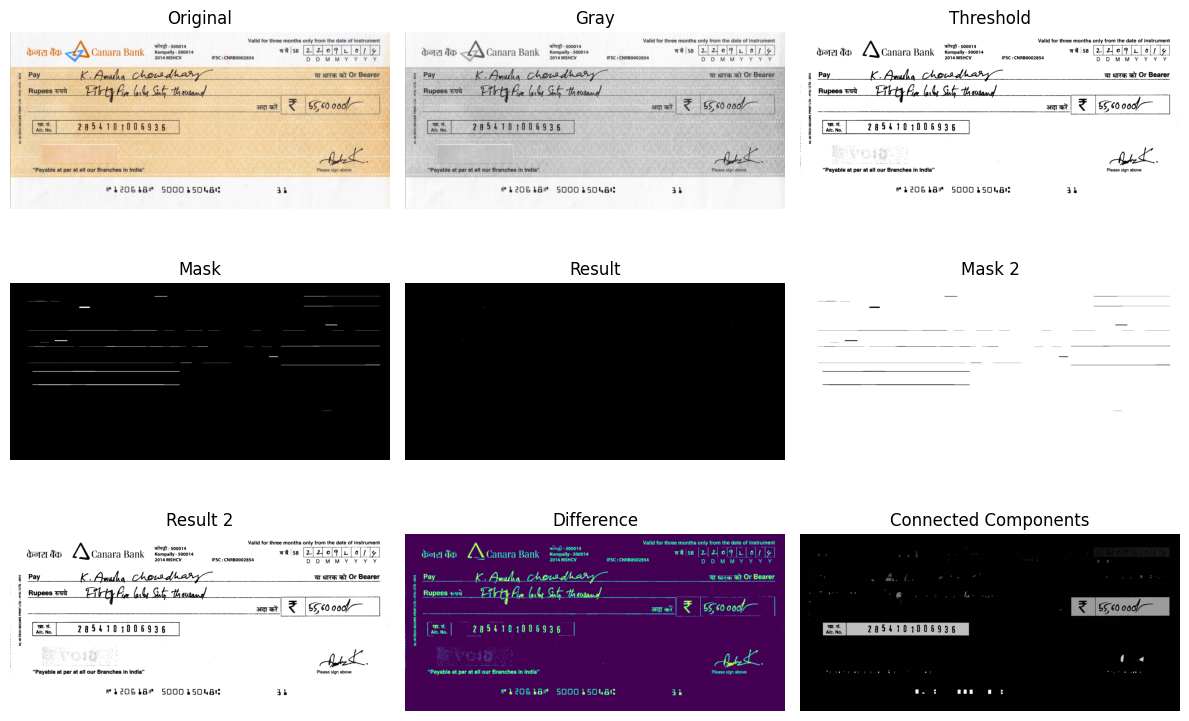

Connected components image saved at: /content/ConnectedComponentsImages/X_074_connected_components.jpg
Processing image: /content/Images/X_073.jpeg


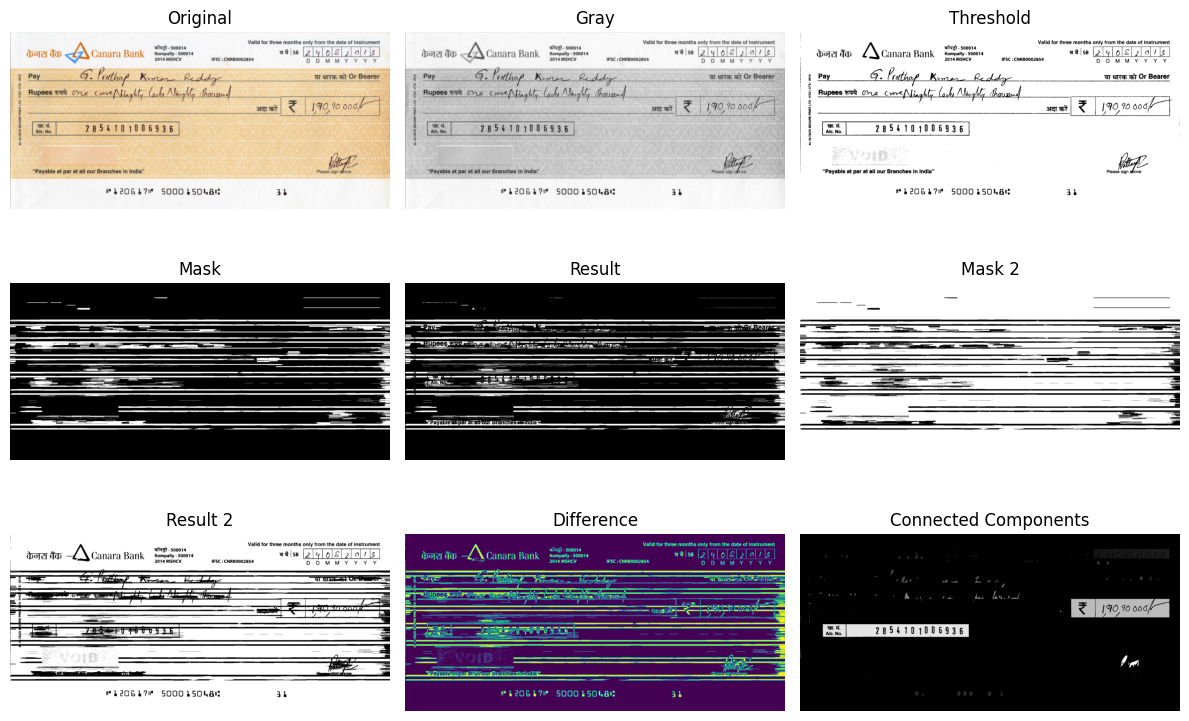

Connected components image saved at: /content/ConnectedComponentsImages/X_073_connected_components.jpg
Processing image: /content/Images/X_066.jpeg


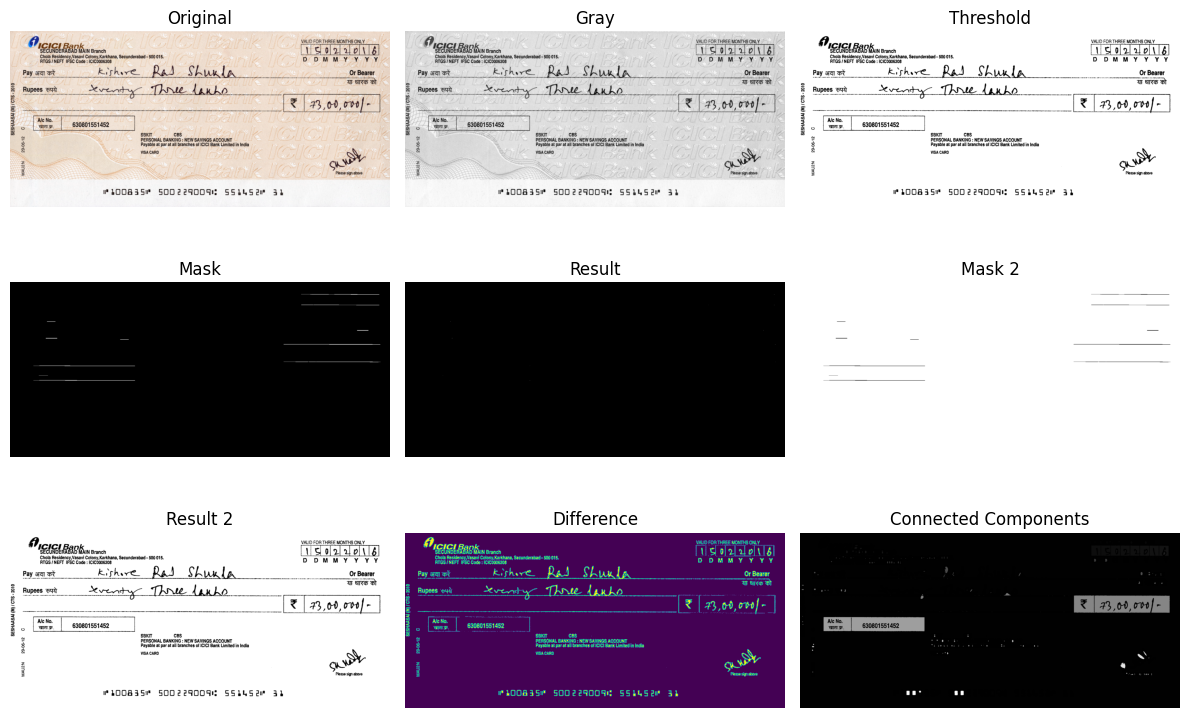

Connected components image saved at: /content/ConnectedComponentsImages/X_066_connected_components.jpg


In [ ]:
# Step 1: Data Preparation
image_folder = '/content/Images'  # Path to the directory containing images
images = os.listdir(image_folder)

# Create a folder to store connected components images if not exists
output_folder = '/content/ConnectedComponentsImages/'
os.makedirs(output_folder, exist_ok=True)

# Process each image and display results
for image_name in images:
    img_path = os.path.join(image_folder, image_name)
    img_data = process_image(img_path)
    if img_data:
        img, gray, thresh, mask, result, mask2, result2, diff, label_image = img_data

        # Display results
        display_results(img_data)

        # Save connected components image
        connected_components_image_path = os.path.join(output_folder, image_name.split('.')[0] + '_connected_components.jpg')
        cv2.imwrite(connected_components_image_path, label_image)
        print("Connected components image saved at:", connected_components_image_path)